In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
from knn import KNN, LOO
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
data = pd.read_csv('/Users/a.konstantinov/Documents/less/data/KNNAlgorithmDataset.csv')
data['diagnosis'] = data['diagnosis'].replace({'B': 0, 'M':1})
X_train, X_test, y_train, y_test= train_test_split(data[data.columns[2:-1]], data['diagnosis'], test_size=0.2, random_state=42)

In [12]:
k, metrics = LOO(data[data.columns[2:-1]],data['diagnosis'], range(1,50))

Text(0.5, 1.0, 'Эмпирический риск для различных k')

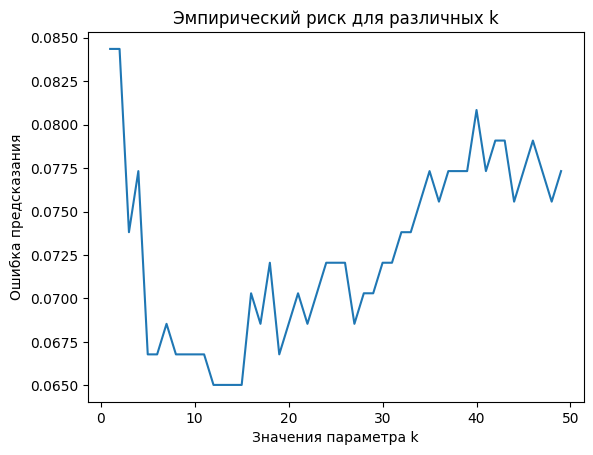

In [13]:
plt.plot( range(1,50), metrics)
plt.xlabel('Значения параметра k')
plt.ylabel('Ошибка предсказания')
plt.title('Эмпирический риск для различных k')

____________________________________________
# Сравнение с эталоном

In [16]:
import time

In [17]:
s = KNN(k, X_train,y_train)
start = time.time()
labels = s.predict(X_test)
print("Время:",time.time() - start)
print("Accuracy:", accuracy_score(y_test, labels))
print("Classification Report:\n", classification_report(y_test, labels))

Время: 0.04900622367858887
Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [18]:
model = KNeighborsClassifier(k, p = 2)
start = time.time()
model.fit(X_train, y_train)
labels_main = model.predict(X_test)
print("Время:",time.time() - start)
print("Accuracy:", accuracy_score(y_test, labels_main))
print("Classification Report:\n", classification_report(y_test, labels_main))

Время: 0.09555411338806152
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

